<a href="https://colab.research.google.com/github/parr129/solely_app/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_healthy = [cv2.imread(file) for file in glob.glob("C:/Users/sahil/OneDrive/Desktop/PROJECT/training/healthy/*.png")]
train_healthy_labels = [0 for _ in range(len(train_healthy))]
train_parkinson = [cv2.imread(file) for file in glob.glob("C:/Users/sahil/OneDrive/Desktop/PROJECT/training/parkinson/*.png")]
train_parkinson_labels = [1 for _ in range(len(train_parkinson))]
test_healthy = [cv2.imread(file) for file in glob.glob("C:/Users/sahil/OneDrive/Desktop/PROJECT/testing/healthy/*.png")]
test_healthy_labels = [0 for _ in range(len(test_healthy))]
test_parkinson = [cv2.imread(file) for file in glob.glob("C:/Users/sahil/OneDrive/Desktop/PROJECT/testing/parkinson/*.png")]
test_parkinson_labels = [1 for _ in range(len(test_parkinson))]

train_images = train_healthy + train_parkinson
test_images = test_healthy + test_parkinson
train_labels = train_healthy_labels + train_parkinson_labels
test_labels = test_healthy_labels + test_parkinson_labels

In [3]:
from skimage.data import camera
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, \
    scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h

def features_edge(image):
    edge_roberts = roberts(image)
    edge_sobel = sobel(image)
    edge_scharr = scharr(image)
    edge_prewitt = prewitt(image)

    fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                           figsize=(12, 10))

    ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
    ax[0].set_title('Roberts Edge Detection')

    ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
    ax[1].set_title('Sobel Edge Detection')

    ax[2].imshow(edge_scharr, cmap=plt.cm.gray)
    ax[2].set_title('Scharr Edge Detection')

    ax[3].imshow(edge_prewitt, cmap=plt.cm.gray)
    ax[3].set_title('Prewitt Edge Detection')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

    return edge_roberts

# Must call on 2D image
#features_edge(grey)

In [ ]:
from skimage.feature import hog
from skimage import data, exposure

def plot_histogram(hog_image):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

def features_hog(image):
    features = hog(image, orientations=9,
                pixels_per_cell=(10, 10), cells_per_block=(2, 2),
                transform_sqrt=True, block_norm="L1")


    return features

In [ ]:
# Convert OpenCV images to numpy arrays for training
train_data = []

for image in train_images:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (300, 300))

    features = features_hog(image)
    train_data.append(features)

(trainX, trainY) = (np.array(train_data), np.array(train_labels))

In [ ]:
test_data = []

for image in test_images:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (300, 300))

    features = features_hog(image)
    test_data.append(features)

(testX, testY) = (np.array(test_data), np.array(test_labels))

print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(72, 30276)
(72,)
(30, 30276)


In [ ]:
# TODO: Train Naive-Bayes, logistic regression, decision trees (random forest), SVM, maybe try DL with Keras
# TODO: Select model that performs best on validation data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, trainX, trainY, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.725000 (0.158154)
LDA: 0.698214 (0.172476)
KNN: 0.642857 (0.169031)
RFC: 0.751786 (0.161397)
CART: 0.594643 (0.204548)
NB: 0.780357 (0.122175)
SVM: 0.480357 (0.107277)


Model Coefficients: [1.52584153]
Model Intercept: -0.23852437102910307

Confusion Matrix:
 [[19  0]
 [ 0 11]]

Classification Report:
               precision  recall  f1-score  support
0                   1.0     1.0       1.0     19.0
1                   1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


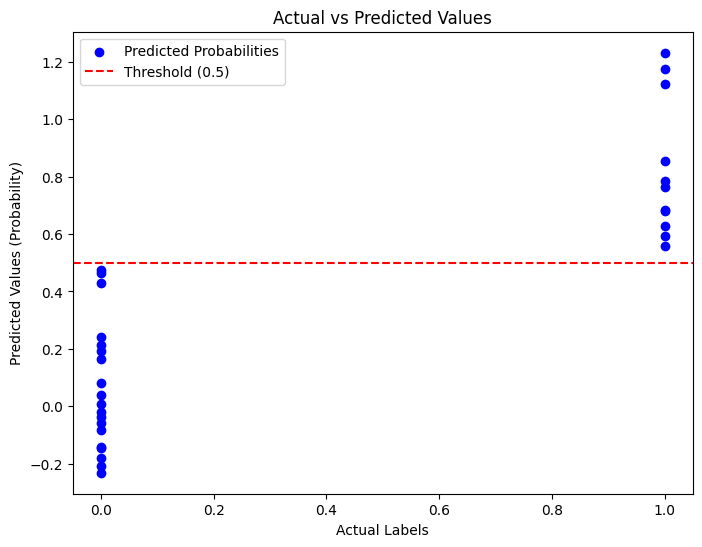

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

# Generate sample binary dataset for demonstration (replace with actual data)
np.random.seed(0)
X = np.random.rand(100, 1)
Y = (X[:, 0] > 0.5).astype(int)  # Binary labels (0 or 1)

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(trainX, trainY)

# Make predictions
predictions = model.predict(testX)

# Convert predictions to binary class labels (0 or 1)
threshold = 0.5
predictions_binary = [1 if pred > threshold else 0 for pred in predictions]

# Print the trained model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Print confusion matrix
conf_matrix = confusion_matrix(testY, predictions_binary)
print("\nConfusion Matrix:\n", conf_matrix)

# Print classification report
class_report = classification_report(testY, predictions_binary, output_dict=True)
print("\nClassification Report:\n", pd.DataFrame(class_report).transpose())

# Plot actual vs predicted probabilities
plt.figure(figsize=(8, 6))
plt.scatter(testY, predictions, color='blue', label="Predicted Probabilities")
plt.axhline(y=threshold, color='red', linestyle='--', label="Threshold (0.5)")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Values (Probability)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


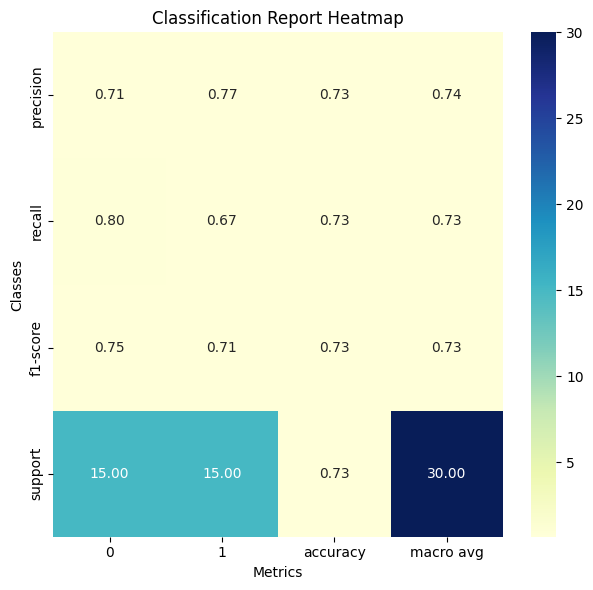

In [ ]:
# Plot both the heatmap and scatter plot
plt.figure(figsize=(12, 6))

# Plot classification report heatmap
plt.subplot(1, 2, 1)
sns.heatmap(class_report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.title("Classification Report Heatmap")


plt.tight_layout()
plt.show()
